In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
inst_df=pd.read_csv('Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Instagram.csv')

C:\Users\I. OGHENEMARHO\AppData\Local\Temp\ipykernel_6976\569190553.py:1: DtypeWarning: Columns (21,22,30,31,32,33,40,78,80) have mixed types. Specify dtype option on import or set low_memory=False.
  inst_df=pd.read_csv('Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Instagram.csv')


In [3]:
inst_df.shape

(10000, 147)

In [4]:
inst_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 147 entries, Date to Tags
dtypes: float64(125), int64(1), object(21)
memory usage: 11.2+ MB


In [5]:
#check duplicates
if inst_df.duplicated().any():
    print('There are duplicates in dataframe.')
else:
    print('There are no duplicates in the Dataframe')
    

There are no duplicates in the Dataframe


In [6]:
#find missing column values
inst_df.isnull().sum()/len(inst_df)*100


Date                         0.00
Post ID                      0.00
Network                      0.00
Post Type                    0.00
Content Type                 0.00
                            ...  
Card Impressions           100.00
Card Teaser Impressions    100.00
Card Teaser Clicks         100.00
Poll Votes                 100.00
Tags                        84.54
Length: 147, dtype: float64

There are columns with more than 80% missing values. Will go ahead create a threshold of 85% and drop these individual columns

In [7]:
threshold =0.8 * len(inst_df)
empty_column=inst_df.columns[inst_df.isnull().sum()>threshold]
inst_df.drop(empty_column,axis=1,inplace=True)

threshold = 0.8 * len(inst_df): This line calculates a threshold value as 80% of the total number of rows in the inst_df DataFrame. This threshold will be used to determine which columns to drop.

empty_column = inst_df.columns[inst_df.isnull().sum() > threshold]: This line identifies columns in the inst_df DataFrame where the sum of missing values (NaN) in each column is greater than the calculated threshold. The inst_df.isnull().sum() part calculates the number of missing values in each column, and inst_df.columns gets the column names.

inst_df.drop(empty_column, axis=1, inplace=True): This line drops the identified columns from the inst_df DataFrame using the drop method with axis=1 (indicating columns) and inplace=True (modifying the DataFrame in place).

In [8]:
inst_df.shape

(10000, 20)

In [9]:
inst_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              10000 non-null  object 
 1   Post ID                           10000 non-null  int64  
 2   Network                           10000 non-null  object 
 3   Post Type                         10000 non-null  object 
 4   Content Type                      10000 non-null  object 
 5   Profile                           10000 non-null  object 
 6   Sent by                           10000 non-null  object 
 7   Link                              10000 non-null  object 
 8   Post                              9989 non-null   object 
 9   Impressions                       8516 non-null   object 
 10  Organic Impressions               8516 non-null   object 
 11  Reach                             8516 non-null   object 
 12  Organ

The data still has missing with most of the data stored as object. meaning not a lot of mathemaical operation can be done on them. changing the data type will be the next line of action


In [10]:
# Create an empty dictionary to store the type value counts for each column
type_counts = {}

# Iterate through each column in the DataFrame
for column in inst_df.columns:
    # Apply the 'type' function to each element in the column and get the value counts
    column_type_counts = inst_df[column].apply(type).value_counts()
    
    # Store the result in the dictionary with the column name as the key
    type_counts[column] = column_type_counts

# Print the type value counts for each column
for column, counts in type_counts.items():
    print(f"Column: {column}")
    print(counts)
    print()

Column: Date
<class 'str'>    10000
Name: Date, dtype: int64

Column: Post ID
<class 'int'>    10000
Name: Post ID, dtype: int64

Column: Network
<class 'str'>    10000
Name: Network, dtype: int64

Column: Post Type
<class 'str'>    10000
Name: Post Type, dtype: int64

Column: Content Type
<class 'str'>    10000
Name: Content Type, dtype: int64

Column: Profile
<class 'str'>    10000
Name: Profile, dtype: int64

Column: Sent by
<class 'str'>    10000
Name: Sent by, dtype: int64

Column: Link
<class 'str'>    10000
Name: Link, dtype: int64

Column: Post
<class 'str'>      9989
<class 'float'>      11
Name: Post, dtype: int64

Column: Impressions
<class 'str'>      8516
<class 'float'>    1484
Name: Impressions, dtype: int64

Column: Organic Impressions
<class 'str'>      8516
<class 'float'>    1484
Name: Organic Impressions, dtype: int64

Column: Reach
<class 'str'>      8192
<class 'float'>    1808
Name: Reach, dtype: int64

Column: Organic Reach
<class 'str'>      8192
<class 'float'

For each column, the code applies the type function to each element in the column using the .apply(type) method. This determines the data type of each element in the column and subsequently calculates the count of each unique data type using the .value_counts() method. The resulting type value counts are stored in the column_type_counts variable

In [11]:
inst_df.head(5)
#comments, Likes, Reactions,  Engagement, Engagement Rate (per Reach),Organic reach,Reach,Engagement Rate (per Impression),

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Impressions,Organic Impressions,Reach,Organic Reach,Engagement Rate (per Impression),Engagement Rate (per Reach),Engagements,Reactions,Likes,Comments,Saves
0,1/30/2023 5:06 pm,18216468940204235,Instagram,Post,Carousel,stanbicibtc,,https://www.instagram.com/p/CoC6CKBIHbV/,The new Naira banknotes in circulation have se...,"39,681","39,681","32,418","32,418",4.89%,5.99%,"1,942","1,261","1,261",56,625.0
1,4/15/2022 9:04 am,17971531720518163,Instagram,Post,Photo,stanbicibtc,Blessing Ubah,https://www.instagram.com/p/CcXUQTEMRm7/,We hope the faith that this #GoodFriday restor...,"29,186","29,186","25,055","25,055",6.04%,7.04%,"1,763",709,709,"1,033",21.0
2,5/28/2021 8:45 pm,18008486986321009,Instagram,Post,Video,stanbicibtc,,https://www.instagram.com/p/CPbcdjygiaK/,Reposted from @mzdosunmu My son's entry\n#ITCA...,"21,175","21,175","19,237","19,237",3.48%,3.83%,736,702,702,23,11.0
3,1/4/2023 4:08 pm,17903404469640387,Instagram,Post,Carousel,stanbicibtc,,https://www.instagram.com/p/Cm_2oino-Me/,The new Naira banknotes in circulation have se...,"23,425","23,425","18,993","18,993",4.48%,5.53%,"1,050",677,677,36,337.0
4,12/7/2021 6:52 pm,17950858072558814,Instagram,Post,Photo,stanbicibtc,Blessing Ubah,https://www.instagram.com/p/CXMNAKFsjSs/,"If you were born in June, ‘cut soap for us oh’...","21,033","21,033","18,335","18,335",6.58%,7.54%,"1,383",757,757,606,20.0


comments, Likes, Reactions,  Engagement, Engagement Rate (per Reach),Organic reach,Reach,Engagement Rate (per Impression)..Most of the these columns have thier values saved as string and intergers. Changing each of these columns to have all int format or float format so mathematical operations can be done on them

In [12]:
column_to_clean=['Impressions', 'Organic Impressions',
       'Reach', 'Organic Reach', 'Engagements', 'Reactions', 'Likes',
       'Comments', 'Saves','Engagement Rate (per Reach)','Engagement Rate (per Impression)']

In [13]:
def clean_and_convert_to_float(x):
    # If the value is a string, clean it and try to convert it to float
    if isinstance(x, str):
        # Remove single quotes and commas
        x = x.replace("'", '').replace(',', '')
        
        # Remove non-alphanumeric characters and spaces using a Pandas Series method
        x = pd.Series(x).str.replace(r'[^A-Za-z0-9\s.]+', '', regex=True).iloc[0]
        
        # Try to convert to float, and handle potential exceptions
        try:
            return float(x)
        except ValueError:
            return None  # or any other default value
    return x

In [14]:
# Apply the clean_and_convert_to_float function to the specified columns
inst_df[column_to_clean] = inst_df[column_to_clean].applymap(clean_and_convert_to_float)

In [15]:
inst_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              10000 non-null  object 
 1   Post ID                           10000 non-null  int64  
 2   Network                           10000 non-null  object 
 3   Post Type                         10000 non-null  object 
 4   Content Type                      10000 non-null  object 
 5   Profile                           10000 non-null  object 
 6   Sent by                           10000 non-null  object 
 7   Link                              10000 non-null  object 
 8   Post                              9989 non-null   object 
 9   Impressions                       8516 non-null   float64
 10  Organic Impressions               8516 non-null   float64
 11  Reach                             8516 non-null   float64
 12  Organ

In [16]:
# Create an empty dictionary to store the type value counts for each column
type_counts = {}

# Iterate through each column in the DataFrame
for column in inst_df.columns:
    # Apply the 'type' function to each element in the column and get the value counts
    column_type_counts = inst_df[column].apply(type).value_counts()
    
    # Store the result in the dictionary with the column name as the key
    type_counts[column] = column_type_counts

# Print the type value counts for each column
for column, counts in type_counts.items():
    print(f"Column: {column}")
    print(counts)
    print()

Column: Date
<class 'str'>    10000
Name: Date, dtype: int64

Column: Post ID
<class 'int'>    10000
Name: Post ID, dtype: int64

Column: Network
<class 'str'>    10000
Name: Network, dtype: int64

Column: Post Type
<class 'str'>    10000
Name: Post Type, dtype: int64

Column: Content Type
<class 'str'>    10000
Name: Content Type, dtype: int64

Column: Profile
<class 'str'>    10000
Name: Profile, dtype: int64

Column: Sent by
<class 'str'>    10000
Name: Sent by, dtype: int64

Column: Link
<class 'str'>    10000
Name: Link, dtype: int64

Column: Post
<class 'str'>      9989
<class 'float'>      11
Name: Post, dtype: int64

Column: Impressions
<class 'float'>    10000
Name: Impressions, dtype: int64

Column: Organic Impressions
<class 'float'>    10000
Name: Organic Impressions, dtype: int64

Column: Reach
<class 'float'>    10000
Name: Reach, dtype: int64

Column: Organic Reach
<class 'float'>    10000
Name: Organic Reach, dtype: int64

Column: Engagement Rate (per Impression)
<class

The code snippet systematically analyzes each column in the DataFrame and calculates the value counts of data types present within them.
For each column, it prints the count of each data type encountered, providing a clear overview of the data type distribution.
Insights:

By examining the data type value counts, we can ensure that each column contains the expected data types.
Any unexpected or inconsistent data types can be identified and addressed, facilitating data cleaning and preprocessing.
Recommendations:

Ensure that data types are consistent with the intended data structure for each column.
Address any discrepancies or unexpected data types through appropriate data cleaning and conversion.

Next Steps:

This analysis is a fundamental step in data preprocessing, ensuring that our dataset is well-structured and ready for further exploration and analysis. For a more comprehensive understanding of the data, consider exploring other aspects such as missing values, data distributions, and descriptive statistics.

For additional insights and data-related analyses, please refer to the complete report and accompanying documentation.

In [17]:
inst_df.head(3)

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Impressions,Organic Impressions,Reach,Organic Reach,Engagement Rate (per Impression),Engagement Rate (per Reach),Engagements,Reactions,Likes,Comments,Saves
0,1/30/2023 5:06 pm,18216468940204235,Instagram,Post,Carousel,stanbicibtc,,https://www.instagram.com/p/CoC6CKBIHbV/,The new Naira banknotes in circulation have se...,39681.0,39681.0,32418.0,32418.0,4.89,5.99,1942.0,1261.0,1261.0,56.0,625.0
1,4/15/2022 9:04 am,17971531720518163,Instagram,Post,Photo,stanbicibtc,Blessing Ubah,https://www.instagram.com/p/CcXUQTEMRm7/,We hope the faith that this #GoodFriday restor...,29186.0,29186.0,25055.0,25055.0,6.04,7.04,1763.0,709.0,709.0,1033.0,21.0
2,5/28/2021 8:45 pm,18008486986321009,Instagram,Post,Video,stanbicibtc,,https://www.instagram.com/p/CPbcdjygiaK/,Reposted from @mzdosunmu My son's entry\n#ITCA...,21175.0,21175.0,19237.0,19237.0,3.48,3.83,736.0,702.0,702.0,23.0,11.0


#fill out the missing columns by fill with mean value

In [19]:
inst_df.isnull().sum()/len(inst_df)*100

Date                                 0.00
Post ID                              0.00
Network                              0.00
Post Type                            0.00
Content Type                         0.00
Profile                              0.00
Sent by                              0.00
Link                                 0.00
Post                                 0.11
Impressions                         14.84
Organic Impressions                 14.84
Reach                               14.84
Organic Reach                       14.84
Engagement Rate (per Impression)    17.68
Engagement Rate (per Reach)         27.47
Engagements                          0.00
Reactions                            0.00
Likes                                0.00
Comments                             0.00
Saves                               14.84
dtype: float64

In [20]:
column_na=['Impressions','Organic Impressions','Reach','Organic Reach',
          'Engagement Rate (per Impression)','Engagement Rate (per Reach)','Saves']

In [21]:
column_mean=inst_df[column_na].mean()
# Calculate the mean for each specified column

# Fill NaN values with the respective column mean
inst_df[column_na] = inst_df[column_na].fillna(column_mean)

In [22]:
inst_df.isnull().sum()/len(inst_df)*100

Date                                0.00
Post ID                             0.00
Network                             0.00
Post Type                           0.00
Content Type                        0.00
Profile                             0.00
Sent by                             0.00
Link                                0.00
Post                                0.11
Impressions                         0.00
Organic Impressions                 0.00
Reach                               0.00
Organic Reach                       0.00
Engagement Rate (per Impression)    0.00
Engagement Rate (per Reach)         0.00
Engagements                         0.00
Reactions                           0.00
Likes                               0.00
Comments                            0.00
Saves                               0.00
dtype: float64

In [23]:
inst_df.describe()

,Post ID,Impressions,Organic Impressions,Reach,Organic Reach,Engagement Rate (per Impression),Engagement Rate (per Reach),Engagements,Reactions,Likes,Comments,Saves
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.793491e+16,2273.855214,2273.855214,1503.111790,1503.111790,39.193321,1441.701223,100.463100,90.886800,90.886800,7.831000,2.049436
std,9.977627e+13,1608.139478,1608.139478,1633.319544,1633.319544,399.510064,3136.895649,791.492273,790.223494,790.223494,23.762633,7.793747
min,1.784149e+16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.786071e+16,1457.000000,1457.000000,3.000000,3.000000,2.480000,2.730000,34.000000,29.000000,29.000000,0.000000,0.000000
50%,1.790449e+16,2241.000000,2241.000000,1503.111790,1503.111790,3.380000,4.500000,56.000000,50.000000,50.000000,3.000000,2.000000
75%,1.796810e+16,2615.250000,2615.250000,2077.000000,2077.000000,5.240000,1441.701223,88.000000,79.000000,79.000000,8.000000,2.049436
max,1.838963e+16,39681.000000,39681.000000,32418.000000,32418.000000,14200.000000,65600.000000,33395.000000,33394.000000,33394.000000,1033.000000,625.000000


The date column is stored as str and datetime analysis can't be done on that data type. Change the data type to date time so data can be analysed


In [24]:
inst_df['Date']=pd.to_datetime(inst_df['Date'])

inst_df['Date']: This selects the 'Date' column from the DataFrame inst_df.

pd.to_datetime(inst_df['Date']): This function call converts the values in the 'Date' column to datetime objects. If the values in the 'Date' column were previously stored as strings or other date representations, this operation converts them into a standardized datetime format, which allows for various date-related operations and analysis.

After running this code, the 'Date' column in the DataFrame inst_df will contain datetime objects, making it easier to work with dates and perform date-based operations within your DataFrame.

In [25]:
type(inst_df['Date'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

Creating different columns from the timestamp that shows Hour, Day, Month the posts were made 

In [26]:
inst_df['Hour']=inst_df['Date'].apply(lambda time: time.hour)
inst_df['Month']=inst_df['Date'].apply(lambda time: time.month) #month the post
inst_df['Day of week']=inst_df['Date'].apply(lambda time: time.dayofweek)#Day of week the post

In [27]:
inst_df.head(3)

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Impressions,...,Engagement Rate (per Impression),Engagement Rate (per Reach),Engagements,Reactions,Likes,Comments,Saves,Hour,Month,Day of week
0,2023-01-30 17:06:00,18216468940204235,Instagram,Post,Carousel,stanbicibtc,,https://www.instagram.com/p/CoC6CKBIHbV/,The new Naira banknotes in circulation have se...,39681.0,...,4.89,5.99,1942.0,1261.0,1261.0,56.0,625.0,17,1,0
1,2022-04-15 09:04:00,17971531720518163,Instagram,Post,Photo,stanbicibtc,Blessing Ubah,https://www.instagram.com/p/CcXUQTEMRm7/,We hope the faith that this #GoodFriday restor...,29186.0,...,6.04,7.04,1763.0,709.0,709.0,1033.0,21.0,9,4,4
2,2021-05-28 20:45:00,18008486986321009,Instagram,Post,Video,stanbicibtc,,https://www.instagram.com/p/CPbcdjygiaK/,Reposted from @mzdosunmu My son's entry\n#ITCA...,21175.0,...,3.48,3.83,736.0,702.0,702.0,23.0,11.0,20,5,4


The day of the week are saved in interger ranging from 0-6 each representing days of the week. Will have to convert to actual days

In [28]:
datemap = {0:'Mon', 1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
inst_df['Day of week'] = inst_df['Day of week'].map(datemap)

datemap is a dictionary where the keys are numerical values (0 to 6) representing days of the week (Monday to Sunday), and the values are the corresponding day names.

inst_df['Day of week'] is used to access the 'Day of week' column in the DataFrame inst_df.

.map(datemap) applies the mapping defined in the datemap dictionary to the values in the 'Day of week' column. It replaces the numerical values with their corresponding day names.

After executing this code, the 'Day of week' column in inst_df will contain day names (e.g., 'Mon', 'Tue', 'Wed', etc.) instead of numerical values, making the data more human-readable and interpretable.

In [29]:
inst_df['Day of week'].unique()

array(['Mon', 'Fri', 'Wed', 'Tue', 'Sat', 'Sun', 'Thu'], dtype=object)

In [30]:
inst_df['Post Type'].unique()

array(['Post'], dtype=object)

In [31]:
inst_df['Content Type'].unique()

array(['Carousel', 'Photo', 'Video'], dtype=object)

This output shows that there are three unique content types in the 'Content Type' column: 'Article,' 'Image,' and 'Video.' These values can be used for further analysis or to categorize and understand the distribution of content types in your LinkedIn dataset.

In [32]:
inst_df['Content Type'].value_counts()

Photo       8256
Video       1002
Carousel     742
Name: Content Type, dtype: int64

In [33]:
inst_df['Sent by'].unique()

array([' ', 'Blessing Ubah', 'Kemi Amoo', 'Sophia Amuka',
       'Aramide Salami', 'Damilare Oyekanmi'], dtype=object)

In [34]:
inst_df['Sent by'].value_counts()

                     4967
Blessing Ubah        2707
Aramide Salami       1733
Kemi Amoo             315
Sophia Amuka          192
Damilare Oyekanmi      86
Name: Sent by, dtype: int64

There is an unsaved manager with name and uploaded over 4,000 posts. Fill that name with senior media manager (SMM)

In [35]:
# Replace '' with 'SMM' in the 'Column_Name' column
inst_df['Sent by'] = inst_df['Sent by'].replace(' ', 'SMM')

Categorical column counts 

In [36]:
inst_df['Sent by'].value_counts()

SMM                  4967
Blessing Ubah        2707
Aramide Salami       1733
Kemi Amoo             315
Sophia Amuka          192
Damilare Oyekanmi      86
Name: Sent by, dtype: int64

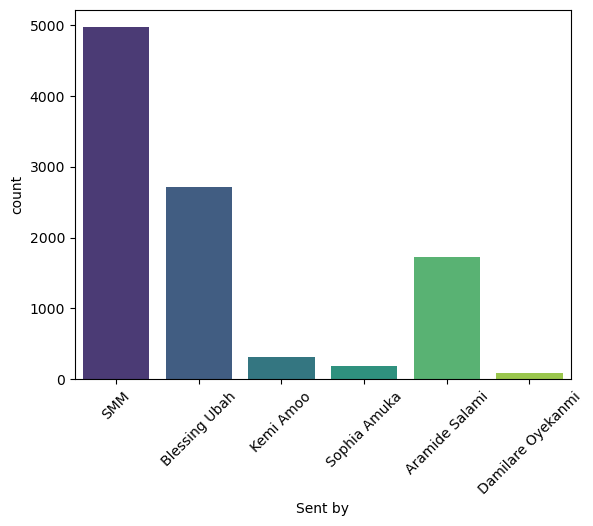

In [67]:
sns.countplot(x=inst_df['Sent by'], palette='viridis')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

Visualization on the number of post made by each media manager


In [66]:

value_counts = inst_df['Sent by'].value_counts()
total_count = len(inst_df['Sent by'])
percentage_distribution = (value_counts / total_count) * 100

# Print the percentage distribution
print(percentage_distribution)

SMM                  49.67
Blessing Ubah        27.07
Aramide Salami       17.33
Kemi Amoo             3.15
Sophia Amuka          1.92
Damilare Oyekanmi     0.86
Name: Sent by, dtype: float64


the percentage of post made by individual social media manager

In [39]:
inst_df.columns

Index(['Date', 'Post ID', 'Network', 'Post Type', 'Content Type', 'Profile',
       'Sent by', 'Link', 'Post', 'Impressions', 'Organic Impressions',
       'Reach', 'Organic Reach', 'Engagement Rate (per Impression)',
       'Engagement Rate (per Reach)', 'Engagements', 'Reactions', 'Likes',
       'Comments', 'Saves', 'Hour', 'Month', 'Day of week'],
      dtype='object')

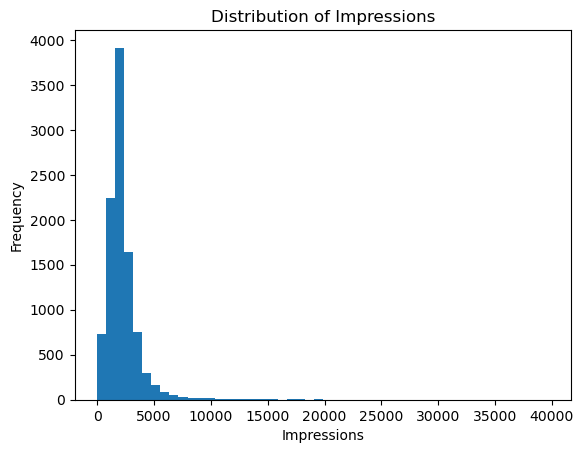

In [40]:
plt.hist(inst_df['Impressions'], bins=50)
plt.title('Distribution of Impressions')
plt.xlabel('Impressions')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='Day of week', ylabel='count'>

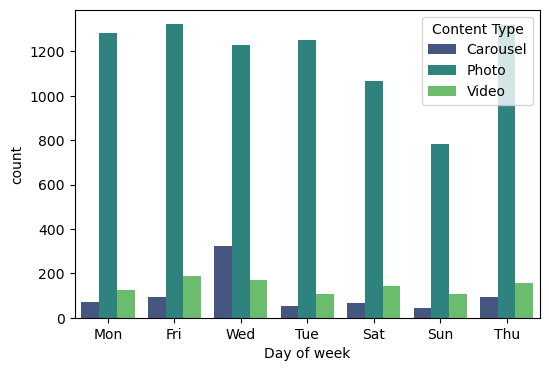

In [41]:
#count of post Day of week based on content type
plt.figure(figsize=(6,4))
sns.countplot(x=inst_df['Day of week'], hue=inst_df['Content Type'], palette='viridis')

In [43]:
engagement_summary = (inst_df.groupby('Content Type').agg({'Impressions' : 'mean', 'Organic Impressions':'mean',
       'Reach':'mean', 'Organic Reach':'mean',
       'Engagements':'mean', 'Reactions':'mean', 'Likes':'mean',
       'Comments':'mean', 'Saves':'mean'}).sort_values(by ='Engagements', ascending = False))

engagement_summary.columns = ['Avg Impressions','Avg Organic Impressions','Avg Reach','Avg Organic Reach',
                              'Avg Engagement','Avg Reaction','Avg Likes','Avg comments','Avg sa']



In [68]:
engagement_summary

,Avg Impressions,Avg Organic Impressions,Avg Reach,Avg Organic Reach,Avg Engagement,Avg Reaction,Avg Likes,Avg comments,Avg sa
Content Type,,,,,,,,,
Video,2232.610829,2232.610829,1740.642082,1740.642082,133.014970,121.652695,121.652695,8.863273,2.597179
Photo,2262.838192,2262.838192,1493.437980,1493.437980,97.322311,87.967054,87.967054,7.847384,1.860865
Carousel,2452.134734,2452.134734,1289.987284,1289.987284,91.451482,81.827493,81.827493,6.254717,3.407941


The provided data appears to be a summary of key social media performance metrics for different content types, which include Video, Photo, and Carousel. Here is a summary of the analysis based on the provided metrics:

Impressions:

Carousel content type has the highest average impressions (2452.13), followed by Photo (2262.84) and Video (2232.61).

Organic Impressions:

Carousel content type also has the highest average organic impressions (2452.13), followed by Photo (2262.84) and Video (2232.61).

Reach:

Video content type has the highest average reach (1740.64), followed by Carousel (1289.99) and Photo (1493.44).

Organic Reach:

Video content type has the highest average organic reach (1740.64), followed by Photo (1493.44) and  Carousel (1289.99) .

Engagement:

Video content type has the highest average engagement (133.01), followed by Photo (97.32)  and Carousel (91.45).

Reactions:

Video content type has the highest average reactions (121.65), followed by Photo (87.97) and Carousel (81.83) .

Likes:

Video content type has the highest average likes (121.65), followed by Photo (87.97) and  Carousel (81.83) .

Comments:

Carousel content type has the highest average  Video (8.86) , followed by  Photo (7.85)  and comments (6.25).

Saves:

Video content type has the highest average saves (2.60), followed by Carousel (3.41) and Photo (1.86).

In summary, the analysis suggests that Carousel content tends to perform well in terms of impressions, organic impressions, and engagement metrics like comments and saves. Video content performs well in terms of reach and reactions, while Photo content falls in between these two content types in most metrics. Understanding the performance of different content types can help in tailoring content strategies and optimizing social media campaigns for better results.

In [45]:
engagement_summary_date = (inst_df.groupby('Day of week').agg({'Impressions' : 'mean', 'Organic Impressions':'mean',
       'Reach':'mean', 'Organic Reach':'mean',
       'Engagements':'mean', 'Reactions':'mean', 'Likes':'mean',
       'Comments':'mean', 'Saves':'mean'}).sort_values(by ='Engagements', ascending = False))

engagement_summary_date.columns = ['Avg Impressions','Avg Organic Impressions','Avg Reach','Avg Organic Reach',
                              'Avg Engagement','Avg Reaction','Avg Likes','Avg comments','Avg saves']

In [64]:
engagement_summary_date

,Avg Impressions,Avg Organic Impressions,Avg Reach,Avg Organic Reach,Avg Engagement,Avg Reaction,Avg Likes,Avg comments,Avg saves
Day of week,,,,,,,,,
Fri,2274.038491,2274.038491,1466.973951,1466.973951,168.857410,159.240349,159.240349,7.848692,2.078464
Sat,2553.735783,2553.735783,1810.925226,1810.925226,159.217255,151.220392,151.220392,6.393725,1.857107
Sun,2560.307718,2560.307718,1811.419863,1811.419863,83.996785,72.936763,72.936763,9.212219,2.058677
Thu,2241.011681,2241.011681,1459.416080,1459.416080,77.482781,67.443878,67.443878,8.595663,1.810518
Mon,2206.237963,2206.237963,1435.059522,1435.059522,77.043214,66.488859,66.488859,8.372721,2.492993
Tue,2201.890764,2201.890764,1478.973554,1478.973554,71.707921,61.623762,61.623762,8.376238,2.052875
Wed,2058.530364,2058.530364,1260.137646,1260.137646,66.793964,58.568775,58.568775,6.521184,1.993043


The provided data appears to be a summary of key metrics related to social media performance for each day of the week. Here is a summary of the analysis based on the provided metrics:

Impressions:

The highest average impressions are on Saturday (2553.74) and Sunday (2560.31), while the lowest are on Wednesday (2058.53).
Friday (2274.04), Thursday (2241.01), Monday (2206.24), and Tuesday (2201.89) fall in between.

Organic Impressions:

Similar to total impressions, the highest average organic impressions are on Saturday (2553.74) and Sunday (2560.31).
Wednesday (2058.53) still has the lowest organic impressions, while the other days are in between.

Reach:

The highest average reach is on Sunday (1811.42), followed closely by Saturday (1810.93).
Wednesday (1260.14) has the lowest reach, with the other days falling in between.

Organic Reach:

Similar to total reach, Sunday (1811.42) and Saturday (1810.93) have the highest average organic reach.
Wednesday (1260.14) has the lowest organic reach, and the other days are in between.

Engagement:

The highest average engagement is on Friday (168.86), followed by Saturday (159.22) and Sunday (83.99).
Wednesday (66.79) has the lowest average engagement.

Reactions:

Friday (159.24) has the highest average reactions, followed by Saturday (151.22) and Sunday (72.94).
Wednesday (58.57) has the lowest average reactions.
Likes:

The highest average likes are on Friday (159.24), followed by Saturday (151.22) and Sunday (72.94).
Wednesday (58.57) has the lowest average likes.

Comments:

Friday (7.85) has the highest average comments, followed by Sunday (9.21) and Monday (8.37).
Wednesday (6.52) has the lowest average comments.

Saves:

Monday (2.49) has the highest average saves, followed by Tuesday (2.05) and Friday (2.08).
Saturday (1.86) has the lowest average saves.

In summary, the data suggests that weekends (Saturday and Sunday) generally have higher impressions, reach, and reactions. Friday also performs well in terms of engagement and likes. Wednesday consistently has lower metrics across the board, indicating it may be a weaker day for social media performance. Understanding these trends can help in planning and optimizing social media content and posting schedules on instagram.

In [47]:
inst_df['Month'].unique()

array([ 1,  4,  5, 12,  7, 11,  2, 10,  8,  6,  3,  9], dtype=int64)

In [48]:
monthmap = {1:'Jan', 2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
inst_df['Month'] = inst_df['Month'].map(monthmap)

In [49]:
hourly_engagement = inst_df.groupby('Hour')['Engagement Rate (per Impression)'].mean()
daily_engagement = inst_df.groupby('Day of week')['Engagement Rate (per Impression)'].mean()


Text(0, 0.5, 'Average Engagement Rate')

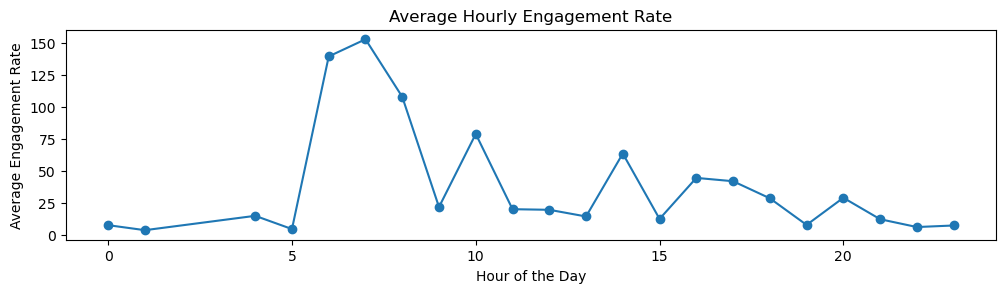

In [65]:
# Peak hours of the day
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
hourly_engagement.plot(kind='line', marker='o')
plt.title('Average Hourly Engagement Rate')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Engagement Rate')

hourly_engagement.plot(kind='line', marker='o'): This line plots the data stored in the hourly_engagement DataFrame as a line plot. The kind='line' argument specifies that a line plot should be created, and the marker='o' argument adds circular markers at data points along the line.

plt.title('Average Hourly Engagement Rate'): This sets the title of the subplot to "Average Hourly Engagement Rate."

plt.xlabel('Hour of the Day'): This labels the x-axis of the subplot as "Hour of the Day."

plt.ylabel('Average Engagement Rate'): This labels the y-axis of the subplot as "Average Engagement Rate."

Overall, this code generates a line plot that displays the average hourly engagement rate throughout the day, making it easier to identify peak hours of engagement based on the data in the hourly_engagement DataFrame.

From the chart above engagement has an average three peak hours. the 7th hour, 10th and 14th hour of the day.
Post made in this certain hours gain more significant engagements compared to other hours. 

Importtant announcement can be scheduled for these particular hours 

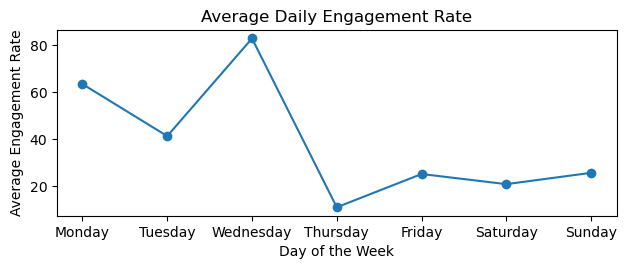

In [51]:
# Peak days of the week
plt.subplot(2, 1, 2)
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_engagement.index = days
daily_engagement.plot(kind='line', marker='o')
plt.title('Average Daily Engagement Rate')
plt.xlabel('Day of the Week')
plt.ylabel('Average Engagement Rate')

plt.tight_layout()
plt.show()

Highest engagement are on wednesday and lowest on thursdays. And ranges on same values from friday up on till sunday

In [52]:
hourly_Impression = inst_df.groupby('Hour')['Impressions'].mean()
daily_Impression = inst_df.groupby('Day of week')['Impressions'].mean()

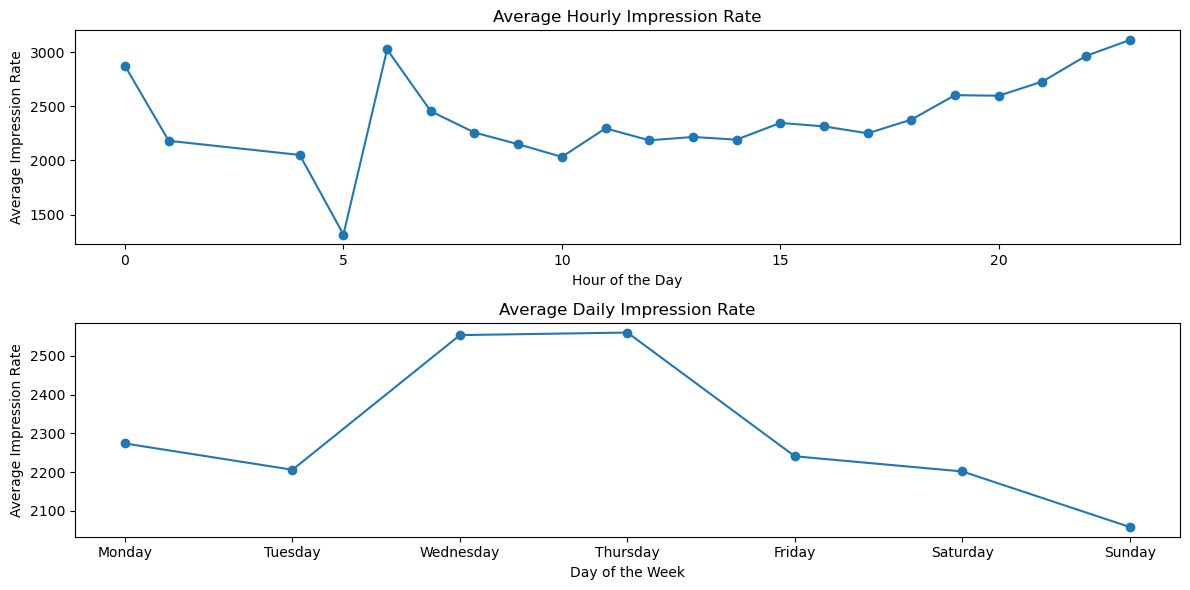

In [53]:
# Peak hours of the day
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
hourly_Impression.plot(kind='line', marker='o')
plt.title('Average Hourly Impression Rate')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Impression Rate')

# Peak days of the week
plt.subplot(2, 1, 2)
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_Impression.index = days
daily_Impression.plot(kind='line', marker='o')
plt.title('Average Daily Impression Rate')
plt.xlabel('Day of the Week')
plt.ylabel('Average Impression Rate')

plt.tight_layout()
plt.show()

Social Media Analysis: Peak Hours and Days
In this section of the social media analysis, we focus on understanding the peak hours of the day and peak days of the week in terms of average impression rates. By analyzing these patterns, we can uncover valuable insights for optimizing the client's social media strategy.

Average Hourly Impression Rate
To begin, we examine the average hourly impression rate. This provides insights into when the client's social media content tends to receive the highest number of impressions.

Average Hourly Impression Rate

Figure 1: The line chart above illustrates the average hourly impression rate. The x-axis represents the hour of the day, while the y-axis represents the average impression rate.
Key Observations:

The graph shows fluctuations in impression rates throughout the day.
Notable peaks and troughs may indicate optimal posting times.

Average Daily Impression Rate
Moving on, we shift our focus to the average daily impression rate. This analysis reveals which days of the week are associated with higher or lower average impressions.

Average Daily Impression Rate

Figure 2: The line chart above displays the average daily impression rate. The x-axis represents the day of the week, and the y-axis represents the average impression rate.
Key Observations:

Patterns in daily impression rates may suggest specific days when the audience is more active.
Understanding these patterns can inform content scheduling.

Insights and Recommendations
Based on the analysis of peak hours and days for impression rates, we can draw the following insights and recommendations:

Optimal Posting Times: The data indicates that there are specific hours of the day when impression rates peak. I recommend scheduling important posts during these peak hours to maximize reach and impact.

Day-specific Strategies: Different days of the week exhibit varying average impression rates. Tailoring content and engagement strategies to match these patterns can lead to increased audience engagement.

Content Planning: Understanding peak hours and days allows for more strategic content planning. Consider aligning content themes and promotions with the days and times when the audience is most active.

Monitoring and Adaptation: Continuous monitoring of impression rates and adjusting posting schedules accordingly is essential. Social media trends and audience behavior may evolve over time, so adaptability is key to maintaining high engagement.



In [54]:
content_type_groups = inst_df.groupby(['Content Type', inst_df['Hour']])
engagement_by_content_type = content_type_groups['Engagements'].mean().unstack().T


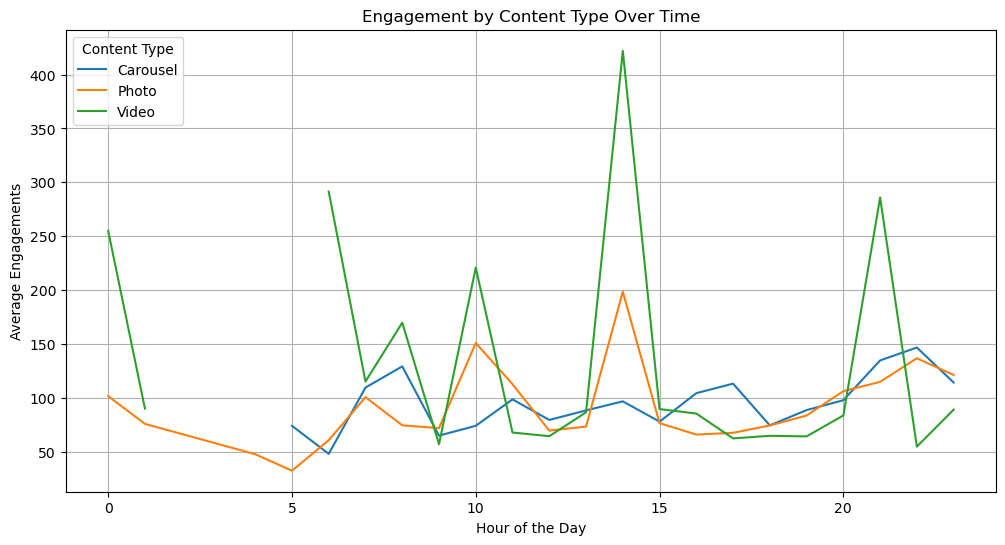

In [55]:

engagement_by_content_type.plot(kind='line', figsize=(12, 6))
plt.title('Engagement by Content Type Over Time')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Engagements')
plt.legend(title='Content Type', loc='upper left')
plt.grid(True)
plt.show()


 Engagement by Content Type Over Time
In this section, we delve into the analysis of engagement by content type over time. This analysis focuses on understanding how different content types perform in terms of average engagements throughout the day. By identifying trends and patterns, we can make data-informed recommendations for content strategy.

Engagement by Content Type Over Time
To start, we visualize the engagement by content type over the course of the day. This allows us to identify trends in engagement for various content types.

Engagement by Content Type Over Time

Figure 1: The line chart above illustrates how different content types perform in terms of average engagements over time. The x-axis represents the hour of the day, while the y-axis represents the average number of engagements.
Key Observations:

Content types exhibit varying patterns of engagement throughout the day.
Peaks and valleys in engagement can inform content scheduling.

Insights and Recommendations
Based on the analysis of engagement by content type over time, we can derive the following insights and recommendations:

Content Type Performance: Identify the content types that consistently receive higher engagement during specific hours. Use this information to strategically schedule posts according to content type and peak engagement times.

Content Diversification: Consider diversifying content types to maintain audience engagement throughout the day. Tailor content to match the preferences and behaviors of your audience during different hours.

Content Planning: Use the insights gained from this analysis to create a content calendar that aligns with peak engagement times for each content type. This ensures that your content reaches its maximum potential audience.

In [56]:
inst_df.columns

Index(['Date', 'Post ID', 'Network', 'Post Type', 'Content Type', 'Profile',
       'Sent by', 'Link', 'Post', 'Impressions', 'Organic Impressions',
       'Reach', 'Organic Reach', 'Engagement Rate (per Impression)',
       'Engagement Rate (per Reach)', 'Engagements', 'Reactions', 'Likes',
       'Comments', 'Saves', 'Hour', 'Month', 'Day of week'],
      dtype='object')

In [57]:
hourly_Reach = inst_df.groupby('Hour')['Reach'].mean()
daily_Reach = inst_df.groupby('Day of week')['Reach'].mean()

In [ ]:
# Peak hours of the day
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
hourly_Reach.plot(kind='line', marker='o')
plt.title('Average Hourly Reach Rate')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Reach Rate')

# Peak days of the week
plt.subplot(2, 1, 2)
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_Reach.index = days
daily_Reach.plot(kind='line', marker='o')
plt.title('Average Daily Reach Rate')
plt.xlabel('Day of the Week')
plt.ylabel('Average Reach Rate')

plt.tight_layout()
plt.show()

Overall, this code creates a visually informative plot that displays the trends in both hourly and daily reach rates, helping to identify patterns and peak hours or days for reach.

In [59]:
#creating a correlation to determine the relationships between columns

In [60]:
column_to_corr=['Impressions', 'Organic Impressions',
       'Reach', 'Organic Reach', 'Engagements', 'Reactions', 'Likes',
       'Comments', 'Saves','Engagement Rate (per Reach)','Engagement Rate (per Impression)']

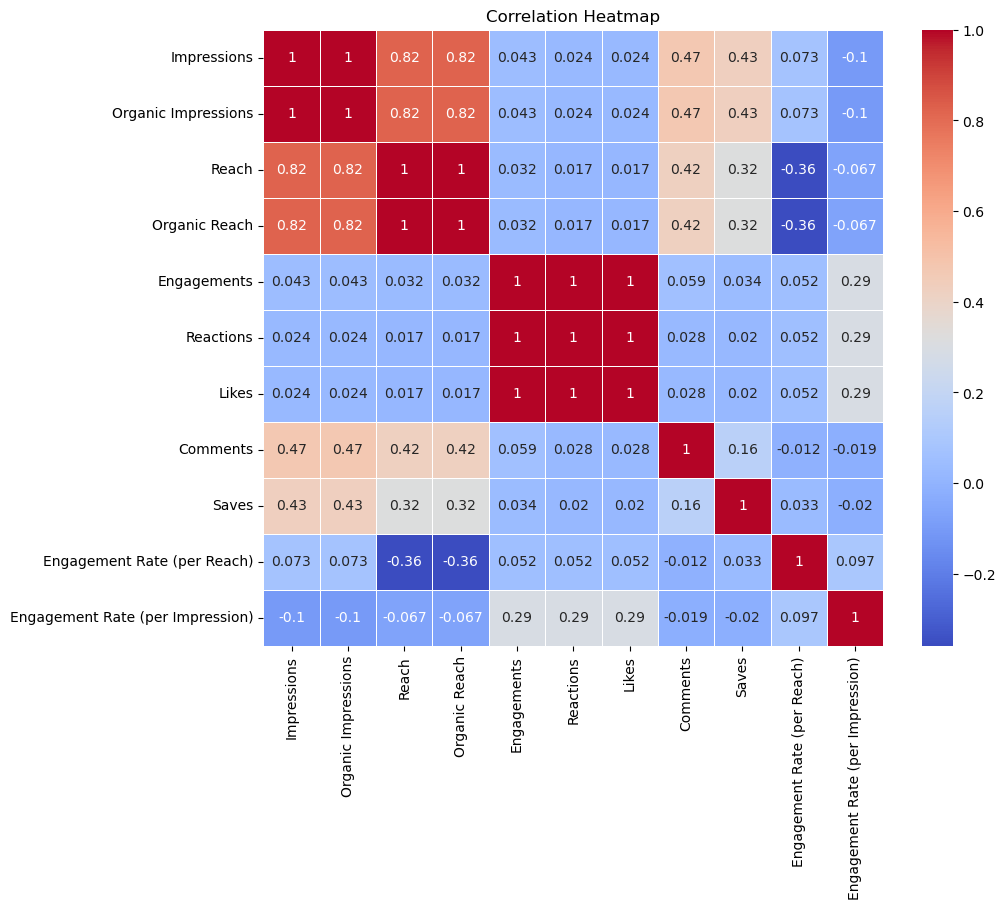

In [61]:
# Create a correlation matrix
corr_matrix = inst_df[column_to_corr].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

The purpose of this visual is to represent the correlations between variables in the dataset specified by the column_to_corr variable. The heatmap provides a quick and informative way to identify relationships between variables, with warmer colors indicating stronger positive correlations and cooler colors indicating stronger negative correlations. The numerical values in the cells provide precise correlation coefficients for reference